In [25]:
import data_analysis.data.read
import data_analysis.transform.transform
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
system_data = data_analysis.data.read.read_lammps_system_data(
    pathlib.Path("/home/egor/Projects/eea1-md-research/experiments/1-FENE_beadspring/data/FENE_initial_system.data"),
)
system_data.atoms

,molecule-ID,type,x,y,z,ix,iy,iz
1,1,1,0.000000,0.000000,0.000000,0,0,0
2,1,1,0.725230,-0.225160,0.603526,0,0,0
3,1,2,0.310438,0.450052,0.044120,0,0,0
4,1,2,0.680324,0.295142,0.927345,0,0,0
5,1,2,0.402564,0.322670,1.856318,0,0,0
...,...,...,...,...,...,...,...,...
2556,20,2,0.142664,-8.078942,4.455773,0,0,0
2557,20,2,0.616889,-8.352064,3.654889,0,0,0
2558,20,2,-0.316484,-8.550768,3.481018,0,0,0
2559,20,2,-1.264813,-8.348350,3.505501,0,0,0


In [4]:
system_data.bonds.sort_values(by="atom1")

,type,atom1,atom2
1,1,1,2
2,1,2,3
3,1,3,4
4,1,4,5
5,1,5,6
...,...,...,...
2536,1,2555,2556
2537,1,2556,2557
2538,1,2557,2558
2539,1,2558,2559


In [5]:
trajectory_df_relax = data_analysis.transform.transform.join_raw_trajectory_df_with_system_data(
    data_analysis.data.read.read_raw_trajectory_df(pathlib.Path("/home/egor/Projects/eea1-md-research/experiments/1-FENE_beadspring/data/polymer_relax.out")),
    system_data=system_data
)
trajectory_df_relax

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,0,1,1,0.000000,0.000000,0.000000,0,0,0,1
1,0,2,1,0.725230,-0.225160,0.603526,0,0,0,1
2,0,3,2,0.310438,0.450052,0.044120,0,0,0,1
3,0,4,2,0.680324,0.295142,0.927345,0,0,0,1
4,0,5,2,0.402564,0.322670,1.856320,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2555,10000000,2556,2,3.391180,25.362200,16.782900,0,0,0,20
2556,10000000,2557,2,3.493220,26.052100,17.413400,0,0,0,20
2557,10000000,2558,2,3.601600,26.574800,18.163800,0,0,0,20
2558,10000000,2559,2,4.023410,27.094600,18.850700,0,0,0,20


In [6]:
trajectory_df_relax.groupby("molecule-ID")["t"].count()

molecule-ID
1     12928
2     12928
3     12928
4     12928
5     12928
6     12928
7     12928
8     12928
9     12928
10    12928
11    12928
12    12928
13    12928
14    12928
15    12928
16    12928
17    12928
18    12928
19    12928
20    12928
Name: t, dtype: int64

In [7]:
system_data.box.bounds

[[-100.0, 100.0], [-100.0, 100.0], [-100.0, 100.0]]

In [11]:
end_to_end_df_relax = data_analysis.transform.transform.calc_end_to_end_df(trajectory_df=trajectory_df_relax, system_data=system_data)

In [12]:
end_to_end_df_relax

molecule-ID  t       
1            0           17.552370
             100000      22.909821
             200000      26.547870
             300000      20.956973
             400000      24.484807
                           ...    
20           9600000     18.815108
             9700000     24.712559
             9800000     27.352942
             9900000     22.792695
             10000000    33.894875
Name: R, Length: 2020, dtype: float64

<Axes: xlabel='t'>

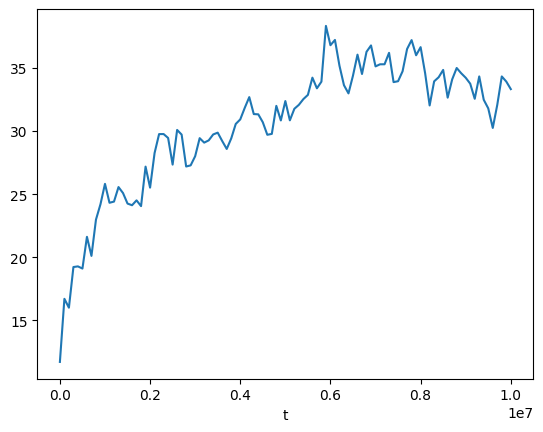

In [13]:
end_to_end_df_relax.groupby("t").mean().plot()

In [14]:
trajectory_df_run = data_analysis.transform.transform.join_raw_trajectory_df_with_system_data(
    data_analysis.data.read.read_raw_trajectory_df(pathlib.Path("/home/egor/Projects/eea1-md-research/experiments/1-FENE_beadspring/data/polymer.out")),
    system_data=system_data
)
trajectory_df_run


,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,10000000,1,1,0.00000,0.000000,0.000000,0,0,0,1
1,10000000,2,1,0.72523,-0.225160,0.603526,0,0,0,1
2,10000000,3,2,1.47086,-0.556675,1.089020,0,0,0,1
3,10000000,4,2,2.05036,-1.313720,0.931731,0,0,0,1
4,10000000,5,2,2.40534,-2.144660,1.161170,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2555,30000000,2556,2,-24.09680,-29.728800,-7.876820,0,0,0,20
2556,30000000,2557,2,-23.98740,-29.873900,-8.907090,0,0,0,20
2557,30000000,2558,2,-23.75890,-30.039700,-9.874100,0,0,0,20
2558,30000000,2559,2,-23.28490,-30.420400,-10.619500,0,0,0,20


In [46]:
trajectory_df_run_unf = data_analysis.transform.transform.unfold_coordinates_df(trajectory_df_run, system_data)
trajectory_df_run_unf

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,10000000,1,1,0.00000,0.000000,0.000000,0,0,0,1
1,10000000,2,1,0.72523,-0.225160,0.603526,0,0,0,1
2,10000000,3,2,1.47086,-0.556675,1.089020,0,0,0,1
3,10000000,4,2,2.05036,-1.313720,0.931731,0,0,0,1
4,10000000,5,2,2.40534,-2.144660,1.161170,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2555,30000000,2556,2,-24.09680,-29.728800,-7.876820,0,0,0,20
2556,30000000,2557,2,-23.98740,-29.873900,-8.907090,0,0,0,20
2557,30000000,2558,2,-23.75890,-30.039700,-9.874100,0,0,0,20
2558,30000000,2559,2,-23.28490,-30.420400,-10.619500,0,0,0,20


In [51]:
data_analysis.transform.transform.calculate_neigh_distance_avg_df(trajectory_df_run_unf)

nan

In [39]:
pd.Series(data=trajectory_df_run[["x", "y", "z"]].values.tolist(), index=trajectory_df_run.index, dtype=object)

0                      [0.0, 0.0, 0.0]
1        [0.72523, -0.22516, 0.603526]
2        [1.47086, -0.556675, 1.08902]
3        [2.05036, -1.31372, 0.931731]
4         [2.40534, -2.14466, 1.16117]
                     ...              
2555    [-24.0968, -29.7288, -7.87682]
2556    [-23.9874, -29.8739, -8.90709]
2557     [-23.7589, -30.0397, -9.8741]
2558    [-23.2849, -30.4204, -10.6195]
2559    [-22.6339, -30.8859, -11.1277]
Length: 5122560, dtype: object

In [15]:
trajectory_df_run["molecule-ID"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [16]:
end_to_end_df_run = data_analysis.transform.transform.calc_end_to_end_df(trajectory_df=trajectory_df_run, system_data=system_data)
end_to_end_df_run

molecule-ID  t       
1            10000000    46.273742
             10010000    47.515861
             10020000    41.067019
             10030000    44.760856
             10040000    47.139140
                           ...    
20           29960000    42.575092
             29970000    44.187335
             29980000    44.113063
             29990000    41.547496
             30000000    39.875531
Name: R, Length: 40020, dtype: float64

<Axes: xlabel='t'>

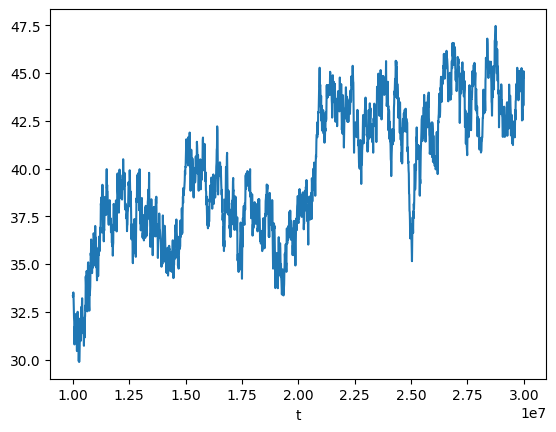

In [17]:
end_to_end_df_run.groupby("t").mean().plot()

In [18]:
df_ete = pd.concat([end_to_end_df_relax, end_to_end_df_run])
df_ete

molecule-ID  t       
1            0           17.552370
             100000      22.909821
             200000      26.547870
             300000      20.956973
             400000      24.484807
                           ...    
20           29960000    42.575092
             29970000    44.187335
             29980000    44.113063
             29990000    41.547496
             30000000    39.875531
Name: R, Length: 42040, dtype: float64

In [20]:
df_ete_change_avg = data_analysis.transform.transform.calculate_ete_change_ens_avg_df(df_ete)
df_ete_change_avg

t
0              0.000000
100000        47.574676
200000        68.884676
300000       108.401998
400000        89.799635
               ...     
29960000    1215.739466
29970000    1319.494169
29980000    1219.085201
29990000    1315.761640
30000000    1311.130722
Name: <R(t)-R(0)>, Length: 2101, dtype: float64

<Axes: xlabel='t'>

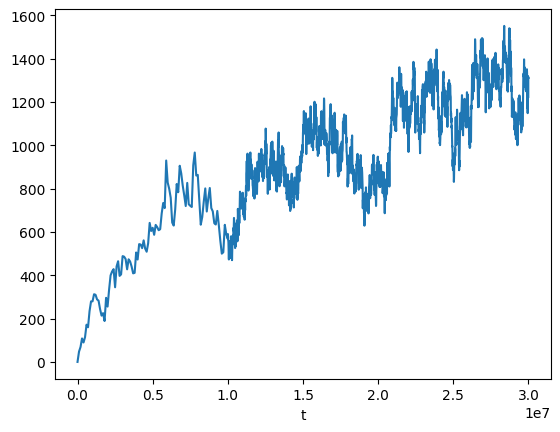

In [29]:
df_ete_change_avg.plot()

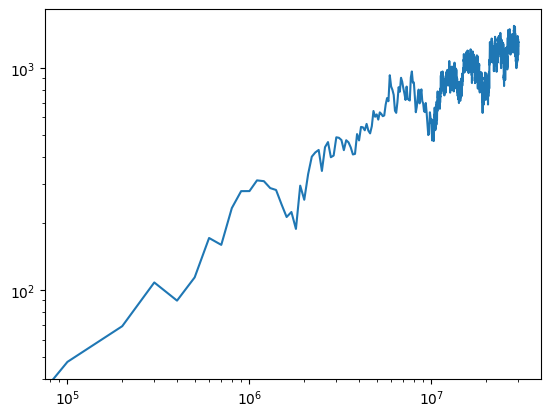

In [30]:
plt.loglog(df_ete_change_avg.index, df_ete_change_avg)

/home/egor/Projects/eea1-md-research/venv/lib/python3.9/site-packages/pandas/core/indexes/base.py:969: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/home/egor/Projects/eea1-md-research/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


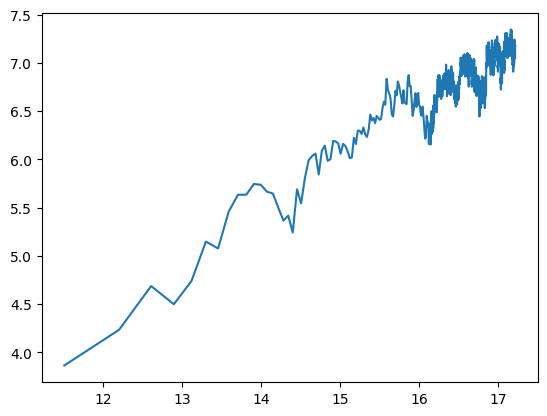

In [26]:
df_ete_change_avg.plot().

In [ ]:
df_ete_change_avg.index

In [ ]:
df_total = pd.concat([end_to_end_df_relax.groupby("t").mean(), end_to_end_df_run.groupby("t").mean()])

In [ ]:
df_total

<Axes: xlabel='t'>

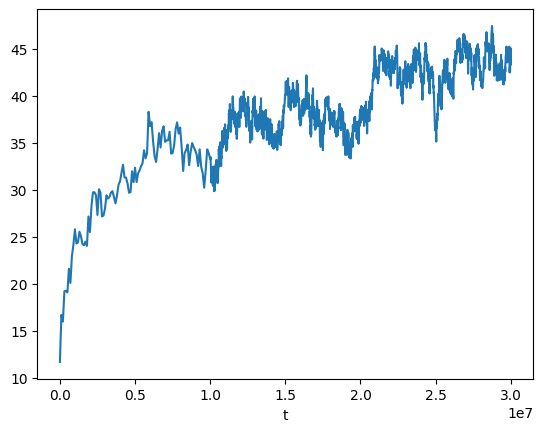

In [14]:
df_total.plot()